In [46]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.linalg import expm
import matplotlib.pyplot as pyp

global g, h, tau, P, L, Max
g = 0.9045
h = 0.809
tau = 0.8

P = 0.1
L = 8

HX = csr_matrix((2**L,2**L), dtype=np.float64).toarray()
HZ = csr_matrix((2**L,2**L), dtype=np.float64).toarray()
Max = 2**L - 1   #Vectors from zero to this number

def compare(main, vect):
    err = 0
    for i in range(len(main)):
        if main[i] != vect[i]:
            err += 1
        if err > 1:
            break
    if err == 1:
        return True
    else:
        return False
    
def actZZ(main):
    suma = 0
    for i in range(len(main)):
        if main[i] == '1':
            suma += h+g*np.sqrt(1.0-P**2)*G[i]*1.0
        else:
            suma += h+g*np.sqrt(1.0-P**2)*G[i]*(-1.0)
    for i in range(len(main)-1):
        if main[i] != main[i+1]:
            suma += -1
        else:
            suma += 1  
    return suma
    
def build(HX, HZ):
    for n in range(Max+1): 
        HZ[n,n] += actZZ(format(n, "0"+str(L)+"b"))
        for i in range(n+1,Max+1):
            if compare(format(n, "0"+str(L)+"b"), format(i, "0"+str(L)+"b")):
                HX[i,n] += g*P
                HX[n,i] += g*P
    return HX, HZ

def eigenvals(HX, HZ, t):    
    print(t)
    UF = np.dot(expm(-1j*0.5*t*HX), np.dot(expm(-1j*t*HZ), expm(-1j*0.5*t*HX) ))

    W1, O = np.linalg.eig(UF.real)
    W2 = 1j*np.dot( O, np.dot( UF.imag, np.transpose(O) )) #Macierz z wartosciami imag na calej macierzy, pozniej biore Re wiec pomijam wartosci z tej macierzy

    W = W1 #+W2 (???) Anyway trzeba dodac inaczej bo zle dodaje

    return UF, W, O

def makeX(j, X):
    for i in range(Max+1):
        vec = list(format(i, "0"+str(L)+"b"))
        if vec[j] == '1': 
            vec[j] = '0'
            X[int(''.join(vec),2),i] = X[i,int(''.join(vec),2)] = 1
    return X

def OTOC(UF):
    M1 = np.dot( np.transpose(np.conjugate(UF)), np.dot(Wt, UF) )
    M = np.dot( np.dot(np.transpose(np.conjugate(M1)),np.transpose(np.conjugate(V)) ), np.dot(M1,V) )

    return np.absolute(np.trace(M)/(Max+1) )**2

In [47]:
Wt = csr_matrix((2**L,2**L), dtype=np.float64).toarray()
V= csr_matrix((2**L,2**L), dtype=np.float64).toarray()

Wt = makeX(0,Wt)
V = makeX(2,V)

In [48]:
iteration = 2
T = 2
global G

data = np.zeros((T))
time = []

for i in range(iteration):
    G = np.random.normal(size=L)
    HX, HZ = build(HX, HZ)
    print(G)
    for n in range(0,T):
        ave = 0
        UF, W, O = eigenvals(HX, HZ, n*2*tau)
        ave = OTOC(UF)
        print(ave)
        data[n] += ave
        
        if i ==0:
            time.append(n*2*tau)
            
data = data/float(iteration)

[ 0.0414616   1.68831842  0.75314076 -1.2227008  -0.09476625  2.37928097
  2.71295919 -1.97428488]
0.0
1.0
1.6
1.0
[ 0.28623882  0.28993425 -0.65521916  0.32204214  0.36042285  1.21462385
 -0.9878118  -1.1442592 ]
0.0
1.0
1.6
1.0


In [51]:
print(Wt)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
print(data)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


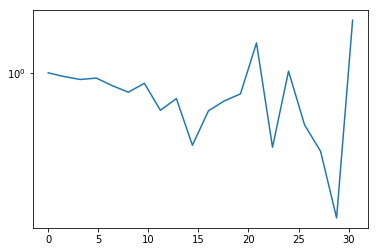

In [9]:
pyp.plot(time, data)
pyp.yscale('log')

In [65]:
#Te wartosci wlasne:
np.arccos(W)

array([0.83744993, 0.8204246 , 0.80384857, 0.86501824, 0.02864675,
       0.0385616 , 0.04603331, 0.74540121, 0.76271336, 0.73214744,
       0.29809785, 0.71075099, 0.71138379, 0.36886084, 0.34304438,
       0.39488366, 0.61081627, 0.68563971, 0.67021283, 0.65290073,
       0.63661295, 0.57164882, 0.44569569, 0.56343904, 0.50047376,
       0.47678175, 0.52477967, 0.55462349, 0.5114846 , 0.51290657,
       0.87224065, 0.65724027, 0.34596734, 0.43902704, 0.45360104,
       0.54556095, 0.55067657, 0.54995355, 0.76087834, 0.32555125,
       0.30909183, 1.00314836, 0.93840474, 0.92279026, 0.89259892,
       0.90181801, 0.90576504, 0.63614225, 0.66748793, 0.45579387,
       0.66802308, 0.04362181, 0.06108108, 1.02046034, 1.02815974,
       0.92024176, 0.94133704, 0.96758188, 0.96217307, 0.45594572,
       0.23281857, 0.24127274, 0.06456326, 0.07785455, 0.07831518,
       0.09071817, 0.08859011, 0.11602892, 1.06973659, 1.12789409,
       1.12040107, 0.1917263 , 0.11358758, 0.12136978, 0.15430

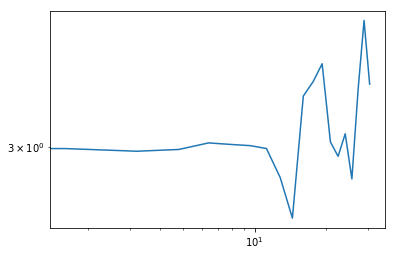

In [67]:
pyp.loglog(time, data)

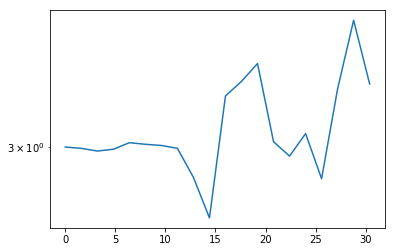

In [68]:
pyp.plot(time, data)
pyp.yscale('log')